#Basketball-reference Decision Tree with K-fold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import numpy as np
#import pylab as pl
#import csv 
from sklearn.svm              import SVC 
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import ShuffleSplit 
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from collections              import defaultdict
from pandas.stats.api         import ols
from sklearn                  import preprocessing

###Read Player Seaaon CSV

In [2]:
df_Season = pd.read_csv('e:\\nba\\Season_Quartile.csv', header=0)
df_Season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3439
Data columns (total 38 columns):
Season       3440 non-null object
Age          3440 non-null float64
Tm           3440 non-null object
Lg           3440 non-null object
Pos          3440 non-null object
G            3440 non-null float64
MP           3440 non-null float64
PER          3440 non-null float64
TS_Per       3440 non-null float64
Three_Per    3440 non-null float64
FT_Per       3440 non-null float64
ORB_Per      3440 non-null float64
DRB_Per      3440 non-null float64
TRB_Per      3440 non-null float64
AST_Per      3440 non-null float64
STL_Per      3440 non-null float64
BLK_Per      3440 non-null float64
TOV_Per      3440 non-null float64
USG_Per      3440 non-null float64
OWS          3440 non-null float64
DWS          3440 non-null float64
WS           3440 non-null float64
WS48         3440 non-null float64
OBPM         3440 non-null float64
DBPM         3440 non-null float64
BPM          3440 non-

###Init Column

In [3]:
vars_list = ['Age','G','MP','EFF','GmSc','PER','ORtg','DRtg','AST_Per','STL_Per','BLK_Per',
             'TOV_Per','TS_Per','FT_Per','Three_Per','ORB_Per','DRB_Per','TRB_Per','USG_Per']
data   = df_Season[vars_list]
target = df_Season['Quartile']

###Normalization

In [4]:
df_tmp = df_Season[vars_list] 
#df_tmp[:,'Salary'] = df_Season_Quartile['Salary']
df_tmp.describe()

df_Season_norm = (df_tmp - df_tmp.min()) / (df_tmp.max() - df_tmp.min())
df_Season_norm.head(5)

,Age,G,MP,EFF,GmSc,PER,ORtg,DRtg,AST_Per,STL_Per,BLK_Per,TOV_Per,TS_Per,FT_Per,Three_Per,ORB_Per,DRB_Per,TRB_Per,USG_Per
0,0.047619,0.975309,0.674213,0.472222,0.439829,0.537108,0.477679,0.899160,0.189624,0.182692,0.252874,0.121,0.490602,0.033833,0.038,0.158813,0.251108,0.356948,0.384279
1,0.142857,0.876543,0.794178,0.472222,0.527681,0.529457,0.450893,0.966387,0.339893,0.144231,0.120690,0.160,0.493421,0.079167,0.268,0.064572,0.113737,0.155313,0.567686
2,0.000000,0.864198,0.324316,0.250000,0.273277,0.526396,0.450893,0.882353,0.246869,0.221154,0.091954,0.185,0.511278,0.065500,0.322,0.085515,0.128508,0.185286,0.539301
3,0.190476,0.975309,0.270803,0.166667,0.200434,0.500383,0.437500,0.890756,0.359571,0.221154,0.022989,0.184,0.461466,0.076333,0.279,0.054101,0.129985,0.163488,0.410480
4,0.142857,1.000000,0.744487,0.416667,0.420258,0.527927,0.486607,0.924370,0.248658,0.153846,0.017241,0.128,0.508459,0.045667,0.328,0.082024,0.162482,0.215259,0.467249


###Decision Tree

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import StringIO, pydot

data   = df_Season_norm[vars_list]
target = df_Season['Quartile']

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10,min_samples_leaf=3)
clf = tree.DecisionTreeClassifier(random_state=99)
clf = clf.fit(data,target)

#dot_data = StringIO.StringIO()  
#tree.export_graphviz(clf, out_file=dot_data,feature_names=vars_list)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png()) 

In [6]:
print clf.classes_ 

for i in xrange(len(clf.feature_importances_)):        
    print "[%-10s] gini value:[%f]" % (vars_list[i],clf.feature_importances_[i])

['Q1' 'Q2' 'Q3' 'Q4']
[Age       ] gini value:[0.122380]
[G         ] gini value:[0.032521]
[MP        ] gini value:[0.041949]
[EFF       ] gini value:[0.046488]
[GmSc      ] gini value:[0.159647]
[PER       ] gini value:[0.051472]
[ORtg      ] gini value:[0.042020]
[DRtg      ] gini value:[0.034917]
[AST_Per   ] gini value:[0.046383]
[STL_Per   ] gini value:[0.038304]
[BLK_Per   ] gini value:[0.040192]
[TOV_Per   ] gini value:[0.050820]
[TS_Per    ] gini value:[0.040723]
[FT_Per    ] gini value:[0.052407]
[Three_Per ] gini value:[0.042456]
[ORB_Per   ] gini value:[0.042064]
[DRB_Per   ] gini value:[0.031819]
[TRB_Per   ] gini value:[0.027004]
[USG_Per   ] gini value:[0.056432]


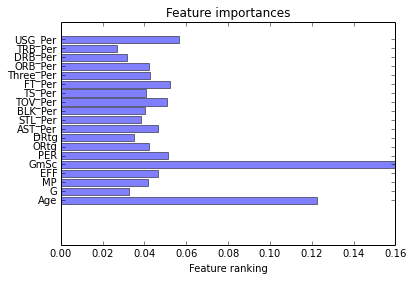

In [7]:
#plt.subplot2grid((2,3),(1,0), colspan=2)
y_pos = np.arange(len(vars_list))
performance = clf.feature_importances_
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances')

plt.show()

###Feature selection using SelectFromModel

In [8]:
from sklearn.feature_selection import SelectFromModel

model_selector = SelectFromModel(clf)
result = model_selector.fit(data,target)
result_list = result.get_support()

print result_list
#for i in xrange(len(result_list)):        
#    print "[%-10s] Ranking support:[%f]" % (vars_list[i],result_list[i])

[ True False False False  True False False False False False False False
 False False False False False False  True]


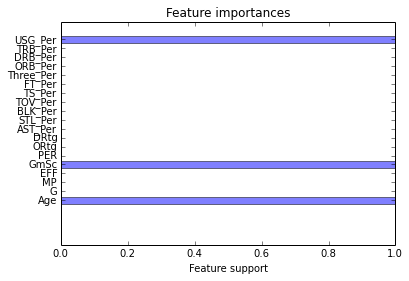

In [9]:
y_pos = np.arange(len(vars_list))
performance = result_list
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature support')
plt.title('Feature importances')

plt.show()

###Cross Validation Using K-fold

In [10]:
from random import shuffle
def k_fold_cross_validation(items, k, randomize=False):

    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in xrange(k)]

    for i in xrange(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        yield training, validation

items = range(20)
for training, validation in k_fold_cross_validation(items, 10):
    print "training   data: %s\nvalidation data: %s" % (training,validation)

training   data: [1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [0, 10]
training   data: [0, 10, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [1, 11]
training   data: [0, 10, 1, 11, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [2, 12]
training   data: [0, 10, 1, 11, 2, 12, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [3, 13]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [4, 14]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 6, 16, 7, 17, 8, 18, 9, 19]
validation data: [5, 15]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 7, 17, 8, 18, 9, 19]
validation data: [6, 16]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 8, 18, 9, 19]
validation data: [7, 17]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 9, 19]
validation data: [8, 18]
training   data: [0, 10, 1, 11, 2, 12, 3, 13, 

In [11]:
data   = df_Season_norm[vars_list]
target = df_Season['Quartile']

data_subset  = []
target_subet = []

for cv_index, (data_train, data_test) in enumerate(k_fold_cross_validation(data, 10)):
    #print "Cross Validation Index: [%s]" % (cv_index)    
    data_subset.append(data_test)

for cv_index, (target_train, target_test) in enumerate(k_fold_cross_validation(target, 10)):
    target_subet.append(target_test)

print "data_set   element : [%d] " % len(data_subset)
print "traget_set element : [%d] " % len(target_subet)

data_set   element : [10] 
traget_set element : [10] 


In [12]:
clf_feature_gini_list = []

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10,min_samples_leaf=3)
clf = tree.DecisionTreeClassifier(random_state=99)

for kfold_index in range(10):
    print "Cross Validation Index [%d] " % (kfold_index)
    clf.fit(data_subset[kfold_index],target_subet[kfold_index])
    print clf.classes_
    print clf.feature_importances_
    
    clf_feature_gini_list.append(clf.feature_importances_)
    
    #for i in xrange(len(clf.feature_importances_)):        
    #    print "[%-10s] gini value:[%f]" % (vars_list[i],clf.feature_importances_[i])


Cross Validation Index [0] 
['Q1' 'Q2' 'Q3' 'Q4']
[ 0.13583829  0.06832722  0.07757776  0.13253874  0.05968565  0.06054376
  0.04963839  0.01355857  0.02763352  0.02462467  0.03023565  0.02405223
  0.03861128  0.08937095  0.02211357  0.02838436  0.03384246  0.03000738
  0.05341555]
Cross Validation Index [1] 
['Q1' 'Q2' 'Q3' 'Q4']
[ 0.12114069  0.02778905  0.06737792  0.03725787  0.1420913   0.0343778
  0.0495885   0.03230102  0.02820667  0.07631978  0.0615071   0.03999613
  0.00921795  0.03978158  0.04244348  0.07047372  0.04390058  0.02539736
  0.05083152]
Cross Validation Index [2] 
['Q1' 'Q2' 'Q3' 'Q4']
[ 0.0901452   0.02370952  0.07484739  0.01727696  0.16222758  0.02587856
  0.04631104  0.04010855  0.0451236   0.04609162  0.03761866  0.05175524
  0.04166595  0.07357576  0.09758903  0.03629406  0.00885998  0.02491922
  0.05600209]
Cross Validation Index [3] 
['Q1' 'Q2' 'Q3' 'Q4']
[ 0.17571007  0.03950103  0.03147836  0.03991458  0.16714177  0.04496465
  0.01929892  0.04161111  0.0

###Cross Validation 0

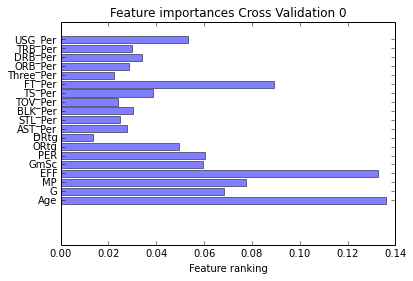

In [13]:
#plt.subplot2grid((2,3),(1,0), colspan=2)
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[0]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 0')

plt.show()

###Cross Validation 1

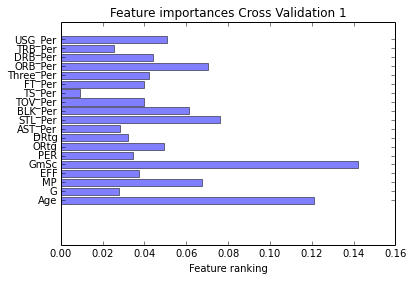

In [14]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[1]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 1')

plt.show()

###Cross Validation 2

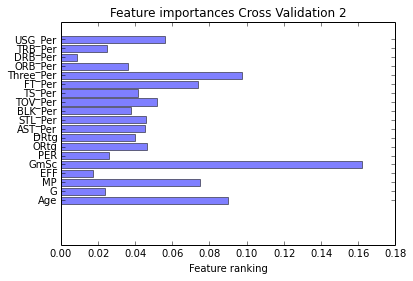

In [15]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[2]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 2')

plt.show()

###Cross Validation 3

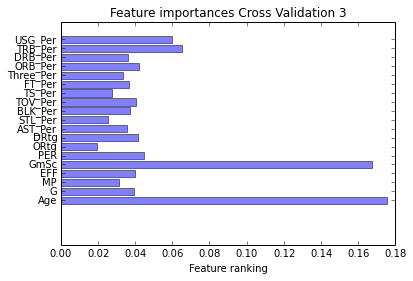

In [16]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[3]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 3')

plt.show()

###Cross Validation 4

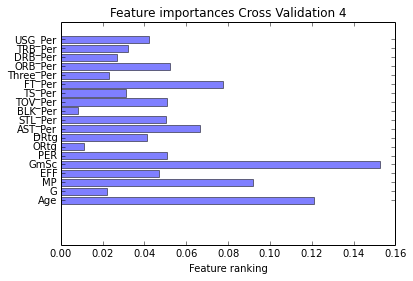

In [17]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[4]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 4')

plt.show()

###Cross Validation 5

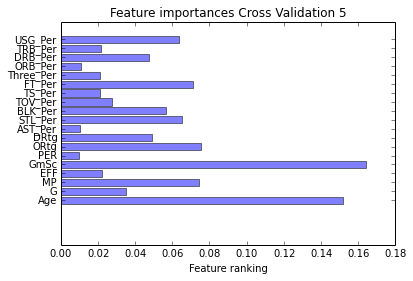

In [18]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[5]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 5')

plt.show()

###Cross Validation 6

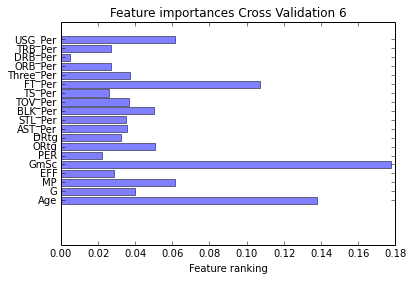

In [19]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[6]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 6')

plt.show()

###Cross Validation 7

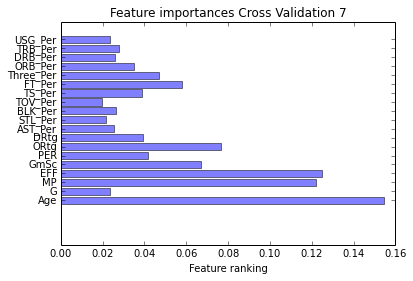

In [20]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[7]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 7')

plt.show()

###Cross Validation 8

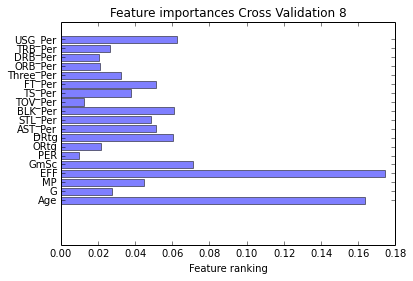

In [21]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[8]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 8')

plt.show()

###Cross Validation 9

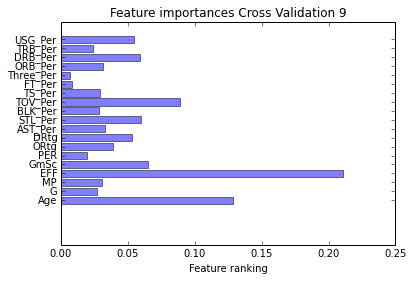

In [22]:
y_pos = np.arange(len(vars_list))
performance = clf_feature_gini_list[9]
error = np.random.rand(len(vars_list))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, vars_list)
plt.xlabel('Feature ranking')
plt.title('Feature importances Cross Validation 9')

plt.show()

###Feature Selection Using RFE

In [23]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

data   = df_Season_norm[vars_list]
target = df_Season['Quartile']

class DecisionTreeClassifierWithCoef(DecisionTreeClassifier):
    def fit(self, *args, **kwargs):
        super(DecisionTreeClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

clf_coef = DecisionTreeClassifierWithCoef(criterion='entropy', max_depth=10,min_samples_leaf=3,random_state=99)

#RFE = RFE(estimator=clf, step=1, cv=10,scoring='accuracy')
#RFECV_selector = RFECV(DecisionTreeClassifier(), step=1, cv=10,scoring='accuracy')
RFE = RFE(estimator=clf_coef, n_features_to_select=15, step=1)
RFE = RFE.fit(data,target)

RFE.ranking_
#clf_f_selector = Pipeline([('feature_selection', RFECV_selector), ('tree', clf)])
#clf_f_selector.fit(data,target)


array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 1])

In [24]:
for i in xrange(len(RFE.ranking_)):        
    print "[%-10s] Ranking value:[%f]" % (vars_list[i],RFE.ranking_[i])

[Age       ] Ranking value:[1.000000]
[G         ] Ranking value:[3.000000]
[MP        ] Ranking value:[1.000000]
[EFF       ] Ranking value:[1.000000]
[GmSc      ] Ranking value:[1.000000]
[PER       ] Ranking value:[1.000000]
[ORtg      ] Ranking value:[1.000000]
[DRtg      ] Ranking value:[1.000000]
[AST_Per   ] Ranking value:[1.000000]
[STL_Per   ] Ranking value:[1.000000]
[BLK_Per   ] Ranking value:[1.000000]
[TOV_Per   ] Ranking value:[1.000000]
[TS_Per    ] Ranking value:[1.000000]
[FT_Per    ] Ranking value:[1.000000]
[Three_Per ] Ranking value:[1.000000]
[ORB_Per   ] Ranking value:[2.000000]
[DRB_Per   ] Ranking value:[4.000000]
[TRB_Per   ] Ranking value:[5.000000]
[USG_Per   ] Ranking value:[1.000000]


## Random permutations cross-validation a.k.a. Shuffle & Split

* The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. 
* Samples are first shuffled and then split into a pair of train and test sets.
* It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number * generator.

In [7]:
#CV
cv = ShuffleSplit(n_samples, n_iter=times, test_size=testsize,random_state=0)
 
for cv_index, (train, test) in enumerate(cv):
   print("# Cross Validation Iteration #%d" % cv_index)
 #  print("train indices: {0}...".format(train[:10]))
 #  print("test indices: {0}...".format(test[:10]))  
    
   svc = SVC(kernel="rbf", C=C1, gamma=gamma1).fit(X[train], y[train])
   print("train score: {0:.3f}, test score: {1:.3f}\n".format(
       svc.score(X[train], y[train]), svc.score(X[test], y[test])))


# Cross Validation Iteration #0
train score: 1.000, test score: 0.978

# Cross Validation Iteration #1
train score: 1.000, test score: 0.975

# Cross Validation Iteration #2
train score: 1.000, test score: 0.980

# Cross Validation Iteration #3
train score: 1.000, test score: 0.977

# Cross Validation Iteration #4
train score: 1.000, test score: 0.975

